Nuevo notebook working for homework

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import wget
import h5py
import pandas as pd
import os
!pip install wget

In [37]:
#wget.download("https://www.dropbox.com/s/po0mhb8iho3wqqt/miniPNW_metadata.csv?dl=1")
#wget.download("https://www.dropbox.com/s/ie34kfu33d2jv9m/miniPNW_waveforms.hdf5?dl=1")
#os.replace("miniPNW_metadata.csv","../../miniPNW_metadata.csv")
#os.replace("miniPNW_waveforms.hdf5","../../miniPNW_waveforms.hdf5")

'miniPNW_waveforms (2).hdf5'

In [3]:
df = pd.read_csv("miniPNW_metadata.csv")
df.head()


,event_id,source_origin_time,source_latitude_deg,source_longitude_deg,source_type,source_depth_km,source_magnitude,source_magnitude_type,source_magnitude_uncertainty,source_depth_uncertainty_km,...,trace_sampling_rate_hz,trace_start_time,trace_S_arrival_sample,trace_P_onset,trace_P_arrival_uncertainty_p,trace_P_arrival_uncertainty_s,trace_P_polarity,trace_S_onset,trace_P_onset.1,split
0,uw61778532,2021-10-07T01:07:00.890000Z,48.297,-121.875,earthquake,6.61,0.75,ml,0.029,1.55,...,100,2021-10-07T01:06:10.890000Z,5968.0,5535.0,0.15,0.06,negative,emergent,impulsive,-0.016|3.238|-1.782
1,uw61694752,2020-12-10T07:27:39.710000Z,46.876,-121.961,earthquake,6.05,0.38,ml,0.170,0.41,...,100,2020-12-10T07:26:49.710000Z,5447.0,5247.0,0.06,0.03,positive,impulsive,impulsive,2.228|-0.148|-1.71
2,uw61534491,2019-07-09T18:09:29.980000Z,45.317,-121.720,earthquake,4.69,1.20,ml,0.323,0.53,...,100,2019-07-09T18:08:39.980000Z,5312.0,5180.0,0.06,0.03,positive,impulsive,impulsive,15.602|16.858|16.695
3,uw61573667,2020-02-12T11:38:12.820000Z,48.711,-123.108,earthquake,59.91,2.02,ml,0.098,1.07,...,100,2020-02-12T11:37:22.820000Z,7609.0,6501.0,0.15,0.06,negative,emergent,impulsive,6.869|4.454|0.464
4,uw61784657,2021-10-29T15:42:17.210000Z,46.150,-122.459,earthquake,15.17,1.67,ml,0.199,1.36,...,100,2021-10-29T15:41:27.210000Z,6373.0,5737.0,0.06,0.15,undecidable,impulsive,emergent,3.938|-0.063|3.206


In [2]:
list(df.keys())

NameError: name 'df' is not defined

In [5]:
labels = df['source_type']

In [6]:
df.describe()

,source_latitude_deg,source_longitude_deg,source_depth_km,source_magnitude,source_magnitude_uncertainty,source_depth_uncertainty_km,source_horizontal_uncertainty_km,station_latitude_deg,station_latitude_deg.1,station_longitude_de,trace_sampling_rate_hz,trace_S_arrival_sample,trace_P_onset,trace_P_arrival_uncertainty_p,trace_P_arrival_uncertainty_s
count,600.000000,600.000000,600.000000,600.000000,592.000000,600.000000,600.000000,1420.000000,1420.000000,1420.000000,1420.0,782.000000,1389.000000,600.000000,598.000000
mean,46.853985,-121.806967,5.699785,1.437267,0.146677,15.827117,1.191217,46.110538,-121.671953,1112.625352,100.0,6814.869565,6504.869690,0.105867,0.089114
std,1.708874,1.409521,9.755103,0.675367,0.098178,15.996679,2.967017,1.853370,1.173497,793.182631,0.0,1156.627166,709.001874,0.063500,0.062169
min,41.829000,-126.824000,-2.580000,0.000000,0.001000,0.000000,0.000000,41.392000,-125.365000,-40.000000,100.0,5069.000000,4999.000000,0.010000,0.010000
25%,46.143750,-122.706750,-0.540000,0.970000,0.078750,0.680000,0.410000,44.055625,-122.224000,364.000000,100.0,5886.750000,5819.000000,0.060000,0.050000
50%,46.961000,-122.018500,-0.170000,1.430000,0.133500,3.185000,0.627000,46.237500,-121.810000,977.100000,100.0,6747.500000,7000.000000,0.060000,0.060000
75%,47.881250,-121.001250,9.835500,1.870000,0.190000,31.610000,1.317500,47.534700,-121.233000,1743.000000,100.0,7515.000000,7000.000000,0.150000,0.150000
max,49.531000,-116.576000,72.234000,3.940000,0.909000,99.900000,64.425000,50.126600,-117.123000,3085.000000,100.0,14757.000000,10059.000000,0.350000,0.400000


['earthquake' 'explosion' 'probable explosion' 'sonic boom'
 'surface event' 'thunder']
6


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'earthquake'),
  Text(1, 0, 'explosion'),
  Text(2, 0, 'sonic boom'),
  Text(3, 0, 'thunder'),
  Text(4, 0, 'surface event'),
  Text(5, 0, 'probable explosion')])

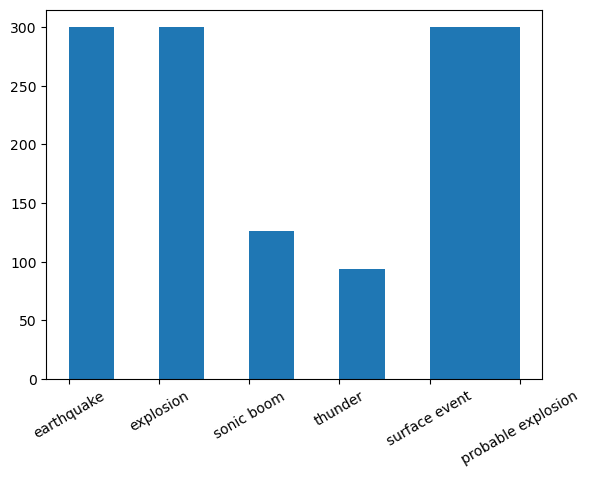

In [7]:
print(np.unique(labels))
print(len(np.unique(labels)))
plt.hist(labels)
plt.xticks(rotation=30)

In [11]:
f = h5py.File("miniPNW_waveforms.hdf5", "r")

In [12]:
def read_data(tn,f):
    bucket, narray = tn.split('$')
    x, y, z = iter([int(i) for i in narray.split(',:')])
    print(f['/data/%s' % bucket].shape)
    data = f['/data/%s' % bucket][x, :y, :z]
    return data

In [13]:
ldata=list(df['trace_name'])

In [14]:
crap=read_data(ldata[40],f)
print(crap.shape)

(300, 3, 15001)
(3, 15001)


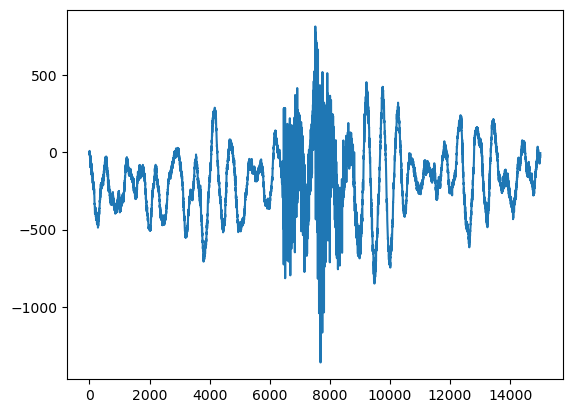

In [15]:
plt.plot(crap[2,:])

In [16]:
nt=crap.shape[-1]
ndata=len(labels)
print(ndata,nt)
Z=np.zeros(shape=(ndata,nt))
for i in range(ndata-1):
#for i in range(299):
    # print(df.iloc[i]["trace_name"])
    print("Done at %f"%(i/ndata))
    Z[i,:]=read_data(df.iloc[i]["trace_name"],f)[2,:nt]

1420 15001
Done at 0.000000
(300, 3, 15001)
Done at 0.000704
(300, 3, 15001)
Done at 0.001408
(300, 3, 15001)
Done at 0.002113
(300, 3, 15001)
Done at 0.002817
(300, 3, 15001)
Done at 0.003521
(300, 3, 15001)
Done at 0.004225
(300, 3, 15001)
Done at 0.004930
(300, 3, 15001)
Done at 0.005634
(300, 3, 15001)
Done at 0.006338
(300, 3, 15001)
Done at 0.007042
(300, 3, 15001)
Done at 0.007746
(300, 3, 15001)
Done at 0.008451
(300, 3, 15001)
Done at 0.009155
(300, 3, 15001)
Done at 0.009859
(300, 3, 15001)
Done at 0.010563
(300, 3, 15001)
Done at 0.011268
(300, 3, 15001)
Done at 0.011972
(300, 3, 15001)
Done at 0.012676
(300, 3, 15001)
Done at 0.013380
(300, 3, 15001)
Done at 0.014085
(300, 3, 15001)
Done at 0.014789
(300, 3, 15001)
Done at 0.015493
(300, 3, 15001)
Done at 0.016197
(300, 3, 15001)
Done at 0.016901
(300, 3, 15001)
Done at 0.017606
(300, 3, 15001)
Done at 0.018310
(300, 3, 15001)
Done at 0.019014
(300, 3, 15001)
Done at 0.019718
(300, 3, 15001)
Done at 0.020423
(300, 3, 15001)

IndexError: Index (300) out of range for (0-299)

In [ ]:
#sample rate 100 hz

In [ ]:
#15000 points

In [17]:
!pip install tsfel


In [18]:
import tsfel

In [19]:
Z.shape
Z_new=Z[:299]
Z_new=np.reshape(Z_new,[15001,299])
Z_new.shape

(15001, 299)

In [20]:
cfg_file=tsfel.get_features_by_domain()
X_train = tsfel.time_series_features_extractor(cfg_file,Z_new,fs=100, window_size=Z.shape[0])

*** Feature extraction started ***


Process ForkPoolWorker-2:
Process ForkPoolWorker-4:
Process ForkPoolWorker-16:
Process ForkPoolWorker-12:
Process ForkPoolWorker-14:
Process ForkPoolWorker-7:
Process ForkPoolWorker-1:
Process ForkPoolWorker-8:
Traceback (most recent call last):
Process ForkPoolWorker-6:
Process ForkPoolWorker-11:
Process ForkPoolWorker-10:
Process ForkPoolWorker-3:
Traceback (most recent call last):
Process ForkPoolWorker-13:
Process ForkPoolWorker-15:
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
Process ForkPoolWorker-5:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Process ForkPoolWorker-9:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/pytho

KeyboardInterrupt: 

  File "/srv/conda/envs/notebook/lib/python3.8/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
  File "/srv/conda/envs/notebook/lib/python3.8/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/srv/conda/envs/notebook/lib/python3.8/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/srv/conda/envs/notebook/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/srv/conda/envs/notebook/lib/python3.8/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.8/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/srv/conda/envs/notebook/lib/python3.8/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
  File "/srv/conda/envs/notebook/lib/python3.8/multiprocessing/process.py", line 108, in 

(299,)